<a href="https://colab.research.google.com/github/RedPanda54/Study/blob/main/Theme%2001.%20%EB%AA%A8%EB%93%A0%20%EA%B2%BD%EB%A1%9C%EC%9D%98%20%EA%B0%9C%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **모든 경로의 개수**


(문제)

n 개의 노드를 가지는 방향 그래프가 주어질 때, 출발점과 도착점까지의 모든 경로의 개수를 구하는 프로그램을 만드시오.

(입력)
1. 첫 줄에 그래프를 구성하는 노드의 개수를 나타내는 자연수 n이 주어진다. (2 <= n <= 10)
2. 두 번째 줄에 출발점의 노드 번호를 나타내는 자연수 st가 주어진다. (1 <= st <= n)
3. 세 번째 줄에 도착점의 노드 번호를 나타내는 자연수 ed가 주어진다. (1 <= ed <= n, 단 st != ed)
4. 네 번째 줄에 그래프의 에지(edge, 간선)의 개수를 나타내는 자연수 k가 주어진다. (1 <= k <= n * (n-1))
5. 다섯 번째 줄부터 k개의 줄에는 에지 정보(u v)가 주어진다. u에서 v로 향하는 에지가 있다는 뜻이며, u와 v는 하나의 공백으로 구분된다.
 - u != v (즉, 자기 자신으로 향하는 에지는 주어지지 않는다.)
 - 똑같은 에지가 중복되어 주어지지 않는다.
 - 사이클(Cycle)이 만들어지는 입력은 주어지지 않는다.

(출력)

출발점과 도착점까지의 모든 경로의 개수를 출력한다. 경로가 존재하지 않는다면, 0을 출력한다.

(제한시간)

모두 1초

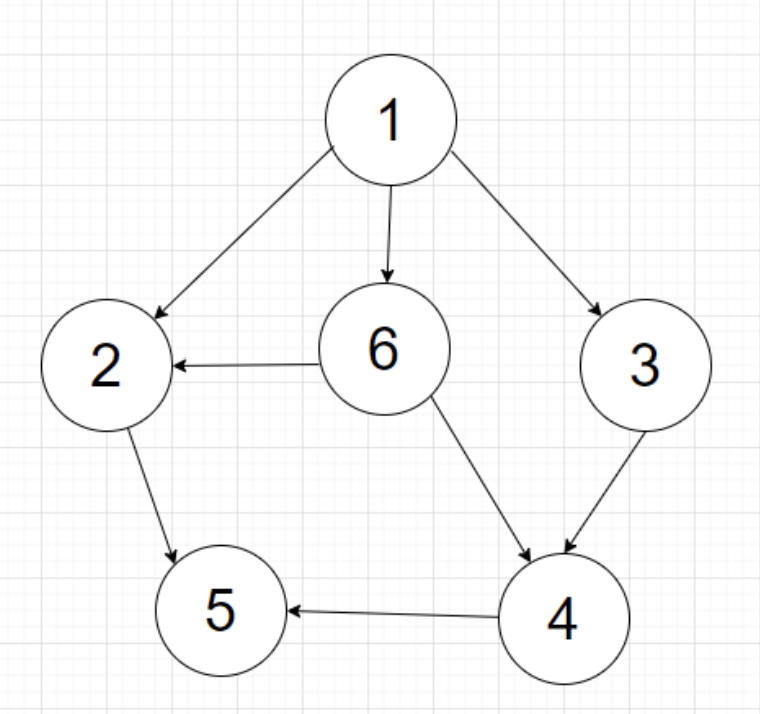

(예제)
<br>
- 1번 노드가 출발점, 5번 노드가 도착점이라면,<br>
 - (1 -> 2 -> 5), (1 -> 6 -> 2 -> 5), (1 -> 3 -> 4 -> 5) 총 4개의 경로가 존재.
 - 따라서, 정답은 4이다.
- 만약, 위의 예시에서 5번 노드에서 4번 노드로 향하는 에지가 한 개 더 있다면,<br>
 - (1 -> 6 -> 4 -> 5), (1 -> 6 -> 4 -> 5 -> 4 -> 5), (1 -> 6 -> 4 -> 5 -> 4 -> 5 -> 4 -> 5 -> ...), 무한 개의 경로가 생긴다.
 - ease 버전에서는 사이클에 대한 입력은 고려하지 않는다.

In [ ]:
# easy 버전
# DFS를 이용한 가장 기본적인 문제.
from collections import defaultdict

def dfs(node):
	global path_count

	# base case
	if node == ed:
		path_count += 1
		return

	# node에서 갈 수 있는 neighbor를 방문한다.
	for neighbor in graph[node]:
		dfs(neighbor)

# 입력
n = int(input())	# 노드의 개수
st = int(input())	# 출발점의 노드 번호
ed = int(input())	# 도착점의 노드 번호
k = int(input())	# 그래프의 에지의 개수
path_count = 0
graph = defaultdict(list)

while(k): # 에지의 개수가 k개. k가 점점 감소하면서 될때, False이 되면서 반복문을 탈출.
	k -= 1
	u, v = map(int, input().split())
	graph[u].append(v)

dfs(st)
print(path_count)


6
1
5
8
1 2
1 6
1 3
2 5
3 4
4 5
6 2
6 4
4


Medium 버전

- 입력으로 주어지는 n의 범위가 늘어났다.
(2 <= n <= 10) => (**2 <= n <= 100**)
- 추가적으로, 경로의 개수가 매우 커질수도 있기 때문에, 경로의 개수를 **1,000,000,007**로 나눈 나머지를 출력한다.

Easy 단계에서 쓰인 코드가 Medium 버전에서는 시간 초과되어버린다. 입력의 크기가 100까지 늘어났기 때문이다.
그렇다면 이 경우에서는 다음의 사고를 가져야 한다.

(1) 불필요한 계산을 줄여야겠다. <br>
(2) 이미 계산한 내용을 리스트든 딕셔너리든 어떠한 효율적인 자료구조에 저장을 해야한다.<br>
(3) 필요한 과정은 무엇일까?
-> DP?!

In [ ]:
# medium 버전
from collections import defaultdict

def get_count_paths(node):

	# 현재의 노드(node)에서 갈 수 있는 인접 노드들(neighbor)에서
	# 도착점까지의 모든 경로의 개수를 더한다.
	dp[node] = 0
	for neighbor in graph[node]:
		if dp[neighbor] == -1:	# '-1'은 아직 방문하지 않은 노드이기 때문의 계산해줘야 한다.
			get_count_paths(neighbor)	# 재귀호출을 통해 계산

		dp[node] += dp[neighbor]
		dp[node] %= 1000000007

# 입력
n = int(input())	# 노드의 개수
st = int(input())	# 출발점의 노드 번호
ed = int(input())	# 도착점의 노드 번호
k = int(input())	# 그래프의 에지의 개수
path_count = 0	  # 경로의 개수
graph = defaultdict(list)	# 인접 리스트: u와 v 노드 사이의 에지를 저장

while k:
	k -= 1
	u, v = map(int, input().split())
	graph[u].append(v)

dp = 	[-1] * (n+1)	# '-1'은 아직 계산되지 않은 노드라는 표시이다.
dp[ed] = 1	# ed단계에서 도착지점까지의 경로는 자기 자신에게 가는 경로니까 1이다.
get_count_paths(st)
print(dp[st])


10
1
10
35
1 2
2 3
3 4
4 5
5 6
6 7
7 8
8 9
9 10
5 8
7 9
2 6
2 4
2 9
4 8
1 10
7 10
3 5
4 6
8 10
6 10
5 9
1 3
2 5
1 8
6 8
4 9
3 6
5 7
3 9
1 6
1 4
6 9
3 10
4 1
189


Hard 버전

- easy 버전에서 다루지 않았던 사이클에 대한 입력도 같이 다룬다.

(사이클이란?)
세 개의 노드가 있다고 치면 이 세 개의 노드만 순회하는 경로를 의미한다.

- 경로가 존재하지 않는다면, 0을 출력한다.
- 경로의 개수가 무한 개라면, -1을 출력한다.


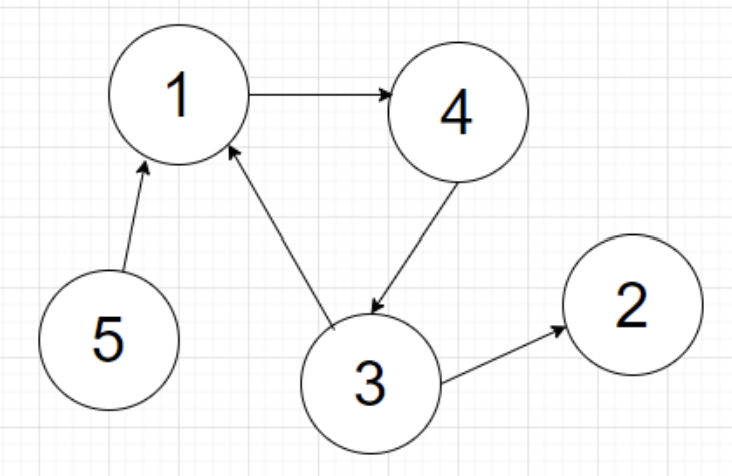

(예시 2)

- 5번 노드가 출발점, 2번 노드가 도착점이라면,<br>
 - (5 -> 1 -> 4 -> 3 -> 2), (5 -> 1 -> 4 -> 3 -> 1 -> 4 -> 3 -> 2), ... 무한 개의 경로가 존재한다.
 - 따라서, 정답은 -1이다.

Hard 단계에서는 노드 사이에 사이클이 존재할 가능성이 생겼다.

[논제] <br>
 (1) 어떻게 사이클이 존재하는지 알 수 있을까?
-> 모든 노드에 대한 방문여부를 새로운 boolean 변수에 저장한다.
	 그래서 다음 노드를 방문할 때, 해당 노드가 True라면 이미 방문한 적이 있는 노드이기 때문에
	 사이클이 존재한다고 판단할 수 있다.

 (2) 사이클이 있어도 경로의 개수를 셀 수 있는 경우가 있다.
	  '-1'을 출력해야 되는 경우는 어떻게 걸러낼 수 있을까?<br>
-> 그래프에 대해 사이클이 존재하는 방식은 여러가지가 있다.

	 예를 들어, 도착점이 사이클 내에 존재한다던지, 사이클을 포함한 부분 그래프가 따로 존재한다던지 등등
	 경로의 개수를 셀 수 있는 경우가 있고, 없는 경우가 있다.
	 일차적으로 도착점까지 갈 수 있는 노드를 역방향 그래프를 통해 찾아내서 예시의 후자같은 케이스를 배제하고,
	 출발점에서 도착점까지의 경로에 사이클이 존재하는 경우를 visited로 찾아내 -1을 출력하게 하는 것이다.

In [ ]:
from collections import defaultdict

global result

# 역방향 그래프를 이용해서 도착점까지 갈 수 있는
# 노드들을 cango_ed 리스트에 표시한다.
def dfs(node):
	cango_ed[node] = True
	for neighbor in graph_reverse[node]:
		if not cango_ed[neighbor]:
			dfs(neighbor)

# node에서 시작해서 도착점까지의
# 모든 경로의 개수를 구하는 함수
def get_count_paths(node):
	global result
	# 방문했던 노드를 다시 방문했다면, 사이클이 생긴 것이다.
	if visited[node]:
		result = -1
		return

	# 예전에 처리했던 노드라면, 기존의 계산했던 값을 이용한다.
	if dp[node] != -1:
		return

	# 현재의 노드(node)에서 갈 수 있는 인접 노드들(neighbor)에서
	# 도착점까지의 모든 경로의 개수를 더한다.
	dp[node] = 0
	visited[node] = True
	for neighbor in graph[node]:
		if cango_ed[neighbor]:
			get_count_paths(neighbor)
			dp[node] += dp[neighbor]
			dp[node] %= 1000000007

	visited[node] = False

n = int(input())	# 노드의 개수
st = int(input())	# 출발점의 노드 번호
ed = int(input())	# 도착점의 노드 번호
k = int(input())	# 그래프의 에지의 개수

graph = defaultdict(list)
graph_reverse = defaultdict(list)

while(k):
	k -= 1
	u, v = map(int, input().split())
	# 그래프 (인접 리스트)
	graph[u].append(v)

	# 역방향 그래프
	graph_reverse[v].append(u)

# cango_ed라는 boolean을 저장한 리스트에는 도착점까지의 경로 유무를 저장한다.
# cango_ed[i] = True :  i번 노드에서 도착점까지 가는 경로가 있는 경우
# cango_ed[i] = False : i번 노드에서 도착점까지 가는 경로가 없는 경우
cango_ed = [False] * (n + 1)
dfs(ed)

# dp[i] = i번 노드에서 도착점(ed)까지의 모든 경로의 개수
dp = [-1] * (n + 1)
dp[ed] = 1

result = 0
visited = [False] * (n + 1)
get_count_paths(st)

if result != 0:
	dp[st] = result
print(dp[st])
1


4
1
4
6
1 2
2 3
3 1
4 1
2 4
4 3
-1
